# Fit standard Bayesian model

author: steeve laquitaine

Fit the standard Bayesian model to psychophysics circular estimates and use it make predictions.

## Setup

In [1]:
# go to the project's root path
import os
os.chdir("..")

In [8]:
# import dependencies
from bsfit.nodes.models.bayes import StandardBayes
from bsfit.nodes.dataEng import (
    simulate_dataset,
)
from bsfit.nodes.utils import (
    get_data, get_data_stats, get_prediction_stats
)
from bsfit.nodes.viz.prediction import plot_mean
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set parameters

In [12]:
# set the parameters
SUBJECT = "sub01"
PRIOR_SHAPE = "vonMisesPrior"
PRIOR_MODE = 225
OBJ_FUN = "maxLLH"
READOUT = "map"
PRIOR_NOISE = [80, 40]      # e.g., prior's std
STIM_NOISE = [0.33, 0.66]   # e.g., motion's coherence

## Simulate dataset

In [13]:
# simulate a training dataset
train_dataset = simulate_dataset(
    stim_noise=STIM_NOISE,
    prior_mode=PRIOR_MODE,
    prior_noise=PRIOR_NOISE,
    prior_shape=PRIOR_SHAPE,
)

# use the train dataset as test to show 
# best predictions
test_dataset = get_data(train_dataset)

## Train model and predict

In [14]:
# instantiate the model
model = StandardBayes(
    prior_shape=PRIOR_SHAPE, 
    prior_mode=PRIOR_MODE, 
    readout=READOUT
    )

# train the model
model = model.fit(dataset=train_dataset)

Training the model ...


Training is complete !


In [17]:
# get predictions
output = model.predict(test_dataset, granularity="trial")
print("predictions data:", output.keys())

Calculating predictions ...

-logl:2382.09, aic:4780.18, kl:[1 1], kp:[1 1], kc:[1], pt:0.00, pr:0.00, km:0.00
predictions data: dict_keys(['PestimateGivenModel', 'map', 'conditions', 'prediction_mean', 'prediction_std', 'trial_pred'])


## Plot stats for data & predictions

In [18]:

# get data stats
estimate = test_dataset[1]
output = get_data_stats(estimate, output)

# get prediction stats
output = get_prediction_stats(output)

/Users/steeve_laquitaine/Desktop/CodeHub/bsfit/bsfit/nodes/circpy.py:93: RuntimeWarning: invalid value encountered in true_divide
  radian = np.arctan(y / x)


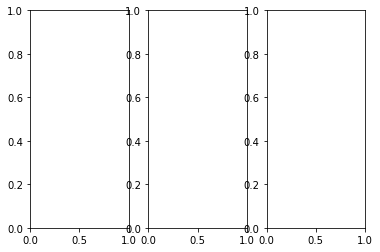

In [21]:
plot_mean(
    output["data_mean"],
    output["data_std"],
    output["prediction_mean"],
    output["prediction_std"],
    output["conditions"],
)

Tutorial complete !